In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
#import os

#import string

%matplotlib inline

In [26]:
# Read in the saved files
directory = 'Binned_results/'

files = glob.glob('Binned_results/*.csv')
all_frames_lst = []

for file in files:
    frame = pd.read_csv(file)
    all_frames_lst.append(frame)
    
master = pd.concat(all_frames_lst)
master.Period = master.Period / 3 # Convert period to unit of hour

# Determine genotype
animal_lst = master.Animal
gen_lst = []

def get_genotype(animal):
    '''Infer the genotype from name of animal'''
    if '2CW' in animal:
        return 'mut'
    elif 'Z1' in animal:
        return 'Other'
    else:
        return 'WT'

master['Genotype'] = master.Animal.apply(get_genotype)

# Exclude days
days_to_exclude = {'2CW318': [],
                  'LB21': [],
                  '2CW312': [],
                  'LB15': []}

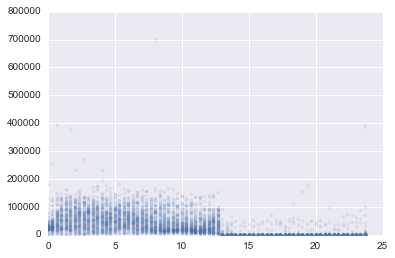

In [21]:
plt.plot(master.Period, master.Activity, '.', alpha=0.1)

In [22]:
# Get average activity for each animal
mean_fr = master.groupby(['Animal','Period']).mean()['Activity']
mean_fr = mean_fr.reset_index()



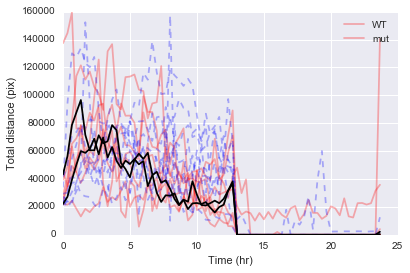

In [23]:
# Plot
for animal in mean_fr.Animal.unique():
    animal_fr = mean_fr[mean_fr.Animal == animal]
    if '2CW' in animal: # mutant
        plt.plot(animal_fr.Period, animal_fr.Activity, alpha=0.3, color='red')
    elif 'Z1' in animal: # other
        plt.plot(animal_fr.Period, animal_fr.Activity, alpha=1, color='black')
    else:
        plt.plot(animal_fr.Period, animal_fr.Activity, '--', alpha=0.3, color='blue')
        
plt.xlabel('Time (hr)')
plt.ylabel('Total distance (pix)')
plt.legend(('WT', 'mut'))
        

In [24]:
# Get 'average line' for wt, mutant, other
mean_fr['Genotype'] = mean_fr.Animal.apply(get_genotype)
genotype_mean_fr = mean_fr.groupby(['Genotype', 'Period']).mean()
genotype_mean_fr = genotype_mean_fr.reset_index()

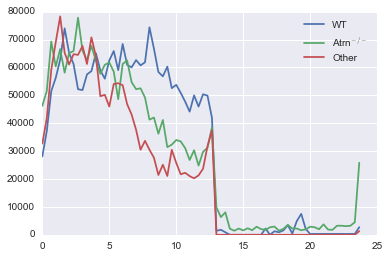

In [25]:
# Plot mean lines
for gtype in ['WT', 'mut', 'Other']:
    fr = genotype_mean_fr[genotype_mean_fr.Genotype == gtype]
    plt.plot(fr.Period, fr.Activity)
    
plt.legend(('WT', 'Atrn$^{-/-}$', 'Other'))

In [80]:
def ind_animal_plot(master, name, exclude=[]):
    membership = master.Day.apply(get_membership, lst=exclude)
    fr = master[(master.Animal == name) & (~membership)]
    for day in fr.Day.unique():
        subfr = fr[fr.Day == day]
        plt.plot(subfr.Period, subfr.Activity, alpha=0.3, label='Day' + str(day))

    # Plot the mean line
    mean_animal_fr = fr.groupby('Period').mean()
    mean_animal_fr = mean_animal_fr.reset_index()
    plt.plot(mean_animal_fr.Period, mean_animal_fr.Activity, '--', 
             color='black', label='Mean')
    
    plt.ylim((0, 200000))

    plt.xlabel('Time (hour)')
    plt.ylabel('Activity')
    plt.legend()

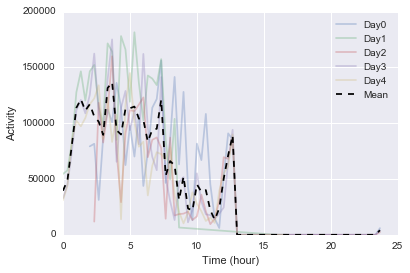

In [81]:
ind_animal_plot(master, '2CW100', exclude=[])

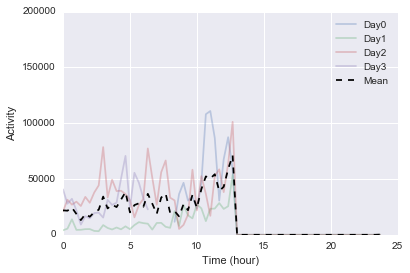

In [82]:
ind_animal_plot(master, '2CW305', exclude=[])

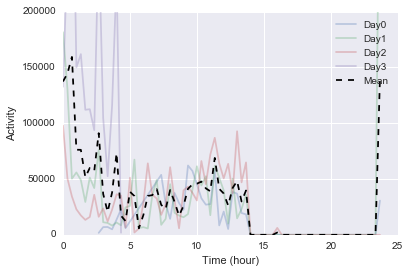

In [87]:
ind_animal_plot(master, '2CW318', exclude=[])

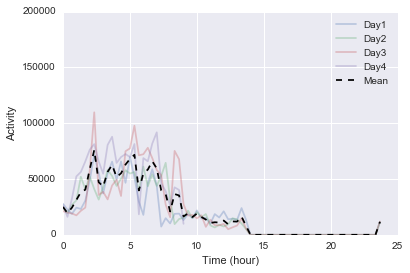

In [91]:
ind_animal_plot(master, 'LB21', exclude=[0])

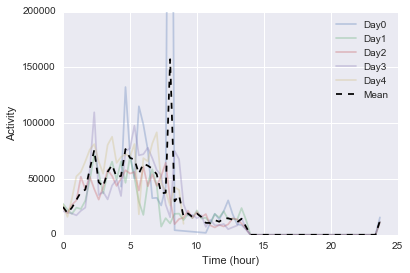

In [92]:
ind_animal_plot(master, 'LB21', exclude=[])

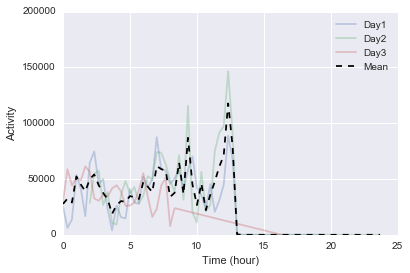

In [95]:
ind_animal_plot(master, 'LB15', exclude=[-1,0])

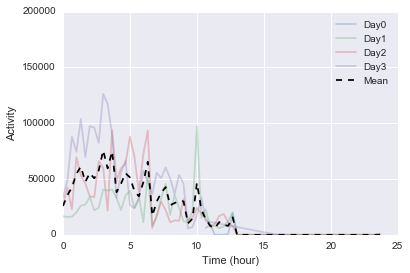

In [96]:
ind_animal_plot(master, '2CW306', exclude=[])

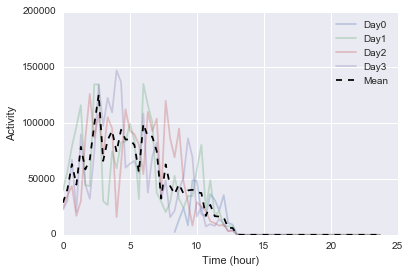

In [97]:
ind_animal_plot(master, '2CW308', exclude=[])

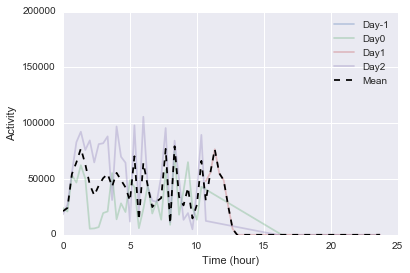

In [98]:
ind_animal_plot(master, 'LB06', exclude=[])

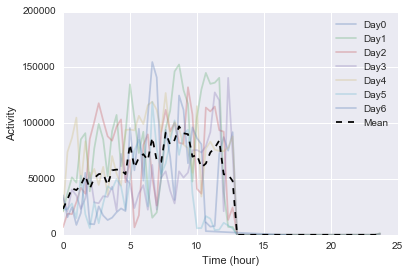

In [99]:
ind_animal_plot(master, 'Or130', exclude=[])

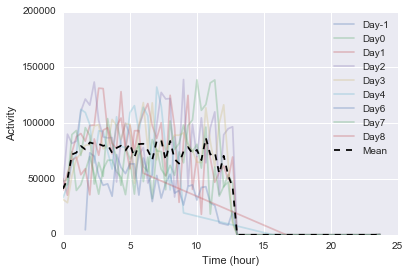

In [100]:
ind_animal_plot(master, 'Or114', exclude=[])

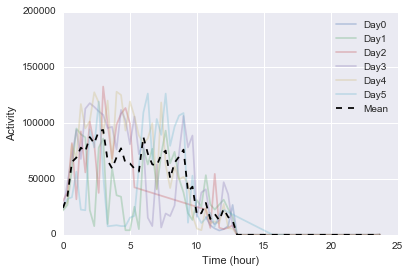

In [101]:
ind_animal_plot(master, '2CW317', exclude=[])

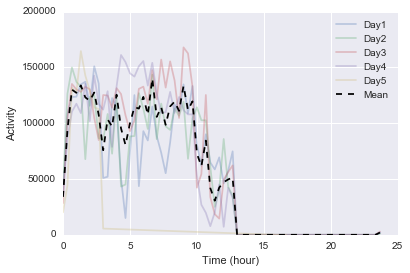

In [103]:
ind_animal_plot(master, 'LB2', exclude=[0])

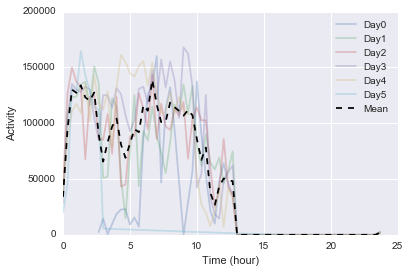

In [104]:
ind_animal_plot(master, 'LB2', exclude=[])

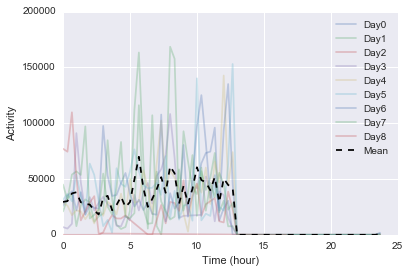

In [105]:
ind_animal_plot(master, 'LB11', exclude=[])

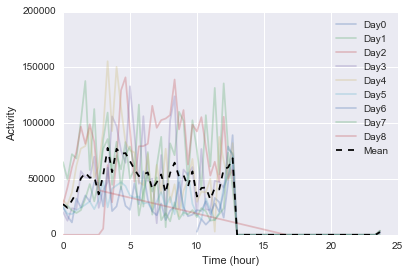

In [106]:
ind_animal_plot(master, 'Or128', exclude=[])

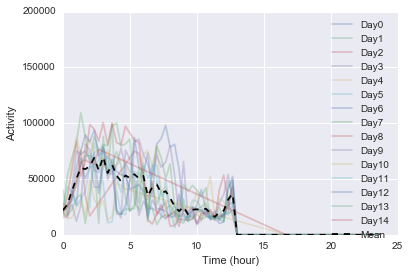

In [107]:
ind_animal_plot(master, 'Z1Pi229', exclude=[])

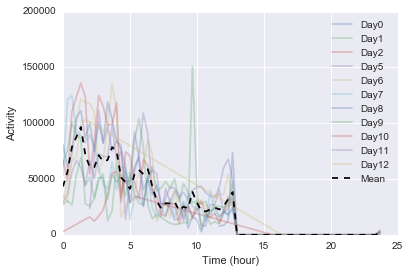

In [108]:
ind_animal_plot(master, 'Z1Pi230', exclude=[])